In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.io.snirf import read_raw_snirf
from get_events_from_snirf import get_events_from_snirf
import itertools
import get_events_from_snirf

In [2]:
path_1 = '../data_hojjat/finger_tap/40.snirf'
# path_1 = '../data_hojjat/2021_08-Finger_Tapping-Hb.snirf'
# path_2 = '../data_hojjat/arm_move/test_001_S001_3b7aaf4_5.snirf'
# path_3 = '../data_hojjat/dec_nef/3/test_001_S001_7d1123e_5.snirf'
# path_1 = '../data_hojjat/arm_move/s01/01/test_001_S001_3b7aaf4_5.snirf'
# path_2 = '../data_hojjat/arm_move/s01/02/test_001_S001_752891f_5.snirf'

In [3]:
snirf_1 = read_raw_snirf(path_1);
# snirf_2 = read_raw_snirf(path_2);

Loading /home/kernel/Desktop/py_test/project/data_hojjat/finger_tap/40.snirf


/home/kernel/Desktop/py_test/project/mne-python/mne/utils/check.py:91: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/home/kernel/Desktop/py_test/project/mne-python/mne/utils/check.py:91: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/home/kernel/Desktop/py_test/project/mne-python/mne/externals/pymatreader/pymatreader.py:34: DeprecationWarning: Please use `get_matfile_version` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.miobase` namespace is deprecated.
  from scipy.io.matlab.miobase import get_matfile_version


In [4]:
events_1 = get_events_from_snirf.get_events_from_snirf(path_1, False)
# events_2 = get_events_from_snirf.get_events_from_snirf(path_2, False)

In [5]:
events_1[(events_1['BlockType'] == 'Right') & (events_1['Event'] == 'StartBlock')]['Timestamp'].values

array([  67.84242344,  139.58232522,  215.84230351,  289.67190671,
        364.79743385,  437.15035963,  510.72528005,  584.25343394,
        657.29535317,  730.21522403,  802.78873086,  875.7298584 ,
        951.15605283, 1022.9163208 , 1095.71979499, 1168.96425676,
       1244.10369754, 1315.54335999, 1388.53433824, 1462.31382418])

In [6]:
def update_ann(snirf, events, event, new_label):
    event_times = events[(events['BlockType'] == event) & (events['Event'] == 'StartBlock')]['Timestamp'].values
    for i, time in enumerate(event_times):
        event_times[i] = np.floor(time)
    cntr = 0
    for i, t in enumerate(snirf.annotations.onset):
        if np.floor(t) in event_times:
            if snirf.annotations.description[i] == 'StartBlock':
                snirf.annotations.description[i] = new_label
                # cntr += 1
                # print(cntr)

In [7]:
def update_anns(snirf, events, event_labels, new_labels):
    for i in range(len(event_labels)):
        update_ann(snirf, events, event_labels[i], new_labels[i])

In [8]:
event_labels = ['Right', 'Left']
new_labels = ['StartRight', 'StartLeft']
update_anns(snirf=snirf_1, events= events_1, event_labels=event_labels, new_labels=new_labels)
# update_anns(snirf=snirf_2, events= events_2, event_labels=event_labels, new_labels=new_labels)

In [9]:
h_dict={}
for ch in snirf_1.ch_names:
    h_dict[ch] = 'fnirs_cw_amplitude'

In [10]:
snirf_1.set_channel_types(h_dict)
# snirf_2.set_channel_types(h_dict)

<RawSNIRF | 40.snirf, 4168 x 10739 (1504.4 s), ~5.6 MB, data not loaded>

In [11]:
# snirf.get_montage()

In [12]:
# snirf.ch_names

In [13]:
import mne

In [14]:
# mne.viz.plot_montage(snirf.get_montage(), kind='3d');

In [15]:
# snirf.to_data_frame().head()

In [16]:
# snirf.annotations.description

In [17]:
%matplotlib inline
%matplotlib widget

In [18]:
tstart_1 = snirf_1.annotations.onset[(snirf_1.annotations.description) == 'StartBlock']
# tstart_2 = snirf_2.annotations.onset[(snirf_2.annotations.description) == 'StartBlock']

In [19]:
# snirf_1.annotations.description

In [20]:
# snirf.plot(n_channdescriptionlen(snirf.ch_names[:2]), duration=120, show_scrollbars=False, scalings='auto', clipping=None, start=tstart);

In [21]:
events_1, event_dict_1 = mne.events_from_annotations(snirf_1)
# events_2, event_dict_2 = mne.events_from_annotations(snirf_2)

Used Annotations descriptions: ['StartExperiment', 'StartIti', 'StartLeft', 'StartRest', 'StartRight', 'StartTrial']


In [22]:
# events[0]

In [23]:
# event_dict

In [24]:
def plot_events(events, event_dict, snirf):
    fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=snirf.info['sfreq'])
    fig.subplots_adjust(right=0.7)

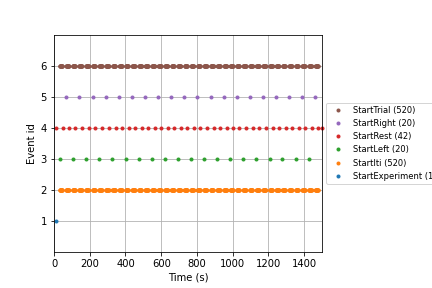

In [25]:
plot_events(events_1, event_dict_1, snirf_1)

In [26]:
# plot_events(events_2, event_dict_2, snirf_2)

In [27]:
# fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=snirf.info['sfreq'])
# fig.subplots_adjust(right=0.7)

In [28]:
def get_epochs(snirf, events, event_dict, tmin, tmax):
    epochs = mne.Epochs(snirf, events, event_id=event_dict, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=True, event_repeated='merge')
    return epochs

In [29]:
tmin, tmax = -5, 20
epochs_1 = get_epochs(snirf_1, events_1, event_dict_1, tmin, tmax)
# epochs_2 = get_epochs(snirf_2, events_2, event_dict_2, tmin, tmax)
# epochs = mne.Epochs(snirf, events, event_id=event_dict, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=True, event_repeated='merge')

Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
1075 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1075 events and 180 original time points ...
1 bad epochs dropped


In [30]:
epochs_1

Number of events,1074
Events,StartExperiment/StartRest: 1StartIti: 473StartIti/StartLeft: 20StartIti/StartRight: 20StartIti/StartTrial: 7StartRest: 40StartTrial: 513
Time range,-5.044 – 20.034 sec
Baseline,-5.000 – 0.000 sec


In [31]:
# ep.plot_compare_evokeds(ochs_2

In [32]:
single_snirf_1 = snirf_1.copy()
# single_snirf_2 = snirf_2.copy()

In [33]:
# ([snirf_1.ch_names[pick] for pick in picks])

In [34]:
st = 'Hojjat'
st.endswith('jsdfat') and st

False

In [35]:
# epochs_single['StartTrial'].plot_image(combine='mean')

S02_D02
combining channels using "gfp"
combining channels using "gfp"


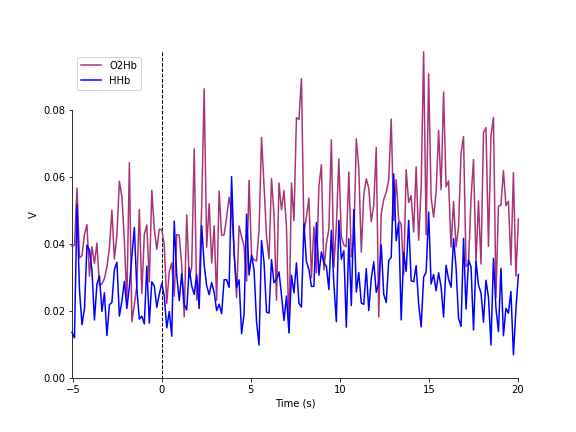

In [41]:
single_snirf_1 = snirf_1.copy()
block = 'StartRest'
channel_name = 'S02_D02'
# channel_name += str(i)
print(channel_name)
picks = mne.pick_channels_regexp(single_snirf_1.ch_names, regexp=channel_name)
sep_ch = single_snirf_1.pick(picks)
epochs_single = mne.Epochs(sep_ch, events_1, event_id=event_dict_1, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=False, event_repeated='merge')
evoked_dict = {'O2Hb': epochs_single[block].average(picks= [st for st in epochs_single.ch_names if st.endswith('HbO')]),
               'HHb': epochs_single[block].average(picks= [st for st in epochs_single.ch_names if st.endswith('HbR')])
              }
for condition in evoked_dict:
  evoked_dict[condition].rename_channels(lambda x: x[:-4])
color_dict = dict(O2Hb='#AA3377', HHb='b')
mne.viz.plot_compare_evokeds(evoked_dict, ci=0.95,
      colors=color_dict);

In [ ]:
picks = mne.pick_channels_regexp(single_snirf.ch_names, regexp=channel_name)
picks

In [ ]:
type(snirf)

In [ ]:
# snirf.plot(order = picks, n_channels=len(picks), duration=10, show_scrollbars=True, scalings='auto', clipping=None, start=tstart, verbose=True);
sep_ch = single_snirf.pick(picks)

In [ ]:
epochs_single = mne.Epochs(sep_ch, events, event_id=event_dict, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=True, event_repeated='merge')

In [ ]:
epochs_single.ch_names

In [ ]:
evoked_dict = {'O2Hb': epochs_single['StartTrial'].average(picks=channel_name+' HbO'),
               'HHb': epochs_single['StartTrial'].average(picks=channel_name+' HbR')
              }

In [ ]:
evoked_dict

In [ ]:
for condition in evoked_dict:
  evoked_dict[condition].rename_channels(lambda x: x[:-4])

In [ ]:
color_dict = dict(O2Hb='#AA3377', HHb='b')

In [ ]:
mne.viz.plot_compare_evokeds(evoked_dict, ci=0.95,
      colors=color_dict);

In [ ]:
epochs['StartBlock'].plot_image(combine='mean')

In [ ]:
channel_name = 'S12_D20'
block = 'StartRest'
sessions_dict = {'O2Hb': epochs_1[block].average(picks=[st for st in epochs_1.ch_names if st.startswith(channel_name) and st.endswith('HbO')]),
   'O2Hb': epochs_2[block].average(picks=[st for st in epochs_2.ch_names if st.startswith(channel_name) and st.endswith('HbO')]),
   'HHb': epochs_1[block].average(picks=[st for st in epochs_1.ch_names if st.startswith(channel_name) and st.endswith('HbR')]),
   'HHb': epochs_2[block].average(picks=[st for st in epochs_2.ch_names if st.startswith(channel_name) and st.endswith('HbR')]),
  }

In [ ]:
# Rename channels until the encoding of frequency in ch_name is fixed
for condition in sessions_dict:
   sessions_dict[condition].rename_channels(lambda x: x[:-4])
    
color_dict = dict(O2Hb='#AA3377', HHb='b')

mne.viz.plot_compare_evokeds(sessions_dict, ci=0.95,
   colors=color_dict, combine='mean');

In [ ]:
nans = (np.sum(np.isnan(snirf_1.get_data()), axis=1))

In [ ]:
nans.shape

In [ ]:
np.unique( [st[:7] for st in np.array(snirf_1.ch_names)[nans == 0]])

In [ ]:
from give_channels import give_channels
give_channels()

In [ ]:
import os.path as op
from itertools import compress 

In [ ]:
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()

In [ ]:
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')

In [ ]:
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)

In [ ]:
(raw_intensity.get_channel_types())

In [ ]:
len(['fnirs_cw_amplitude' for _ in range(len(snirf.ch_names))])

In [ ]:
h_dict={}
for ch in snirf.ch_names:
    h_dict[ch] = 'fnirs_cw_amplitude'

In [ ]:
snirf.set_channel_types(h_dict)

In [ ]:
raw_intensity.load_data()

In [ ]:
raw_intensity.plot(n_channels=2)